<a href="https://colab.research.google.com/github/Colsai/DATA-690-WANG/blob/master/DATA601_PRJ_3_rev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "A Closer Look at Public New York City High School Trends in Low Income/Poverty Markers *(2015-2019)*"
## Scott Hirabayashi  
## DATA601: Project 3 | Spring 2021, WAN 
---  
## Previous Projects:
- Project 1: EDA analysis on Chicago Public Schools (School Performance Comparison between types of schools. 
- Project 2: Analysis on trends within past 4 years comparing charter schools to neighborhood in Chicago Public Schools.
- Project 3: Trends in low income/poverty metrics for students in New York Public High Schools.

### Background:
The New York City Public School system is the largest public school system in the United States. It now serves over 1 million students, and is a large and diverse population of students.

This is also reflected in their High School system:.
<blockquote> NYC’s high school population of 320,393 is almost double that of the closest district (LA). There are more high school students in NYC than Houston’s total public school population." (Steinhardt) </blockquote>

With the great importance that New York City Public High Schools play, this project will explore major poverty metrics for students who attend High Schools in the New York City area, from data collected on the US government's open data portal.   
  
**References:**
1. https://steinhardt.nyu.edu/research-alliance/research/spotlight-nyc-schools/nyc-public-schools-what-does-it-mean-be-nations
2. https://www.census.gov/library/visualizations/2019/comm/largest-school-districts.html

In [1]:
%%html
<iframe src="https://www.schools.nyc.gov/" width="1200" height="600"></iframe>

### About Project 3:
1. In this project, I'll use multiple datasets to look at general poverty statistics, and specifically, poverty for High School students in New York City. 
2. This data will come from multiple datasets- one on the state of public High Schools, and one on all schools in New York as a whole. 
3. Then, I'll look for trends across years to see what conclusions can be draw on the data. 

### Indicators to focus on:

| Year | Explanation |  
|---|---|  
| Temp Housing | Percent of Students who are living in Temporary Housing |
| Economic Need Index |The school’s Economic Need Index is the average of its students’ Economic Need Values. |
| HRA Eligible | The percentage Students who qualify for HRA (income-based stipend/SNAP assistance) |
| Poverty % | Percentage of students in poverty |  |


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import os
import scipy
import scipy.stats

%matplotlib inline

In [3]:
#Check Version of Pandas, Numpy, Seaborn, SciPy
print(f"Pandas Version: {pd.__version__}")
print(f"NumPy Version: {np.__version__}")
print(f"Seaborn Version: {sns.__version__}")
print(f"SciPy Version: {scipy.__version__}")

Pandas Version: 1.1.5
NumPy Version: 1.19.5
Seaborn Version: 0.11.1
SciPy Version: 1.4.1


# 1. First Dataset: High School HRA Elig/Economic Need/Temp Housing
In the next section, I will explain the data that I have chosen, and include sources and information for reference.

## Load First Dataset for Project 3
This is a targeted and specific look at New York Public High Schools. Some of the poverty metrics changed in the 2014-2015 dataset, so I will only look at the last 4 years, seen here. 

**Datasets used: (.gov open data)**

| Year | Data Source |  
|---|---|  
| 2014/2015 | https://data.cityofnewyork.us/Education/2014-2015-School-Quality-Reports-Results-For-High-/vrfr-9k4d | |
| 2015/2016 | https://data.cityofnewyork.us/Education/2015-2016-School-Quality-Report-Results-for-High-S/mz5e-yub2 | |
| 2016/2017 | https://data.cityofnewyork.us/Education/2016-2017-School-Quality-Report-Results-for-High-S/ewhs-k7um | |
| 2017/2018 | https://data.cityofnewyork.us/Education/2017-2018-School-Quality-Report-High-School/7c8x-xds8  | |


In [4]:
#Load data into dataframes (4 datasets used)
start = time.time()
try:
    df_1415 = pd.read_excel('https://data.cityofnewyork.us/download/vrfr-9k4d/application%2Fvnd.ms-excel', header = 1)
    df_1516 = pd.read_csv('https://data.cityofnewyork.us/api/views/mz5e-yub2/rows.csv?accessType=DOWNLOAD')
    df_1617 = pd.read_csv('https://data.cityofnewyork.us/api/views/ewhs-k7um/rows.csv?accessType=DOWNLOAD')
    df_1718 = pd.read_csv('https://data.cityofnewyork.us/api/views/7c8x-xds8/rows.csv?accessType=DOWNLOAD')
except:
    print("Data Did Not Load Correctly")

f"Finished ({time.time() - start} seconds.)"

'Finished (5.9775471687316895 seconds.)'

## Data Exploration and Cleaning
- Short Look at one of the DataFrames
- Explain the target of our data exploration (Poverty Metrics in Public High Schools)
- Explore the Data

In [5]:
#What is the shape of the data?
df_1415.shape

(491, 40)

In [6]:
#More Info
df_1415.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 40 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   DBN                                                                                     491 non-null    object 
 1   School Name                                                                             491 non-null    object 
 2   School Type                                                                             491 non-null    object 
 3   Enrollment                                                                              491 non-null    int64  
 4   Rigorous Instruction Rating                                                             431 non-null    object 
 5   Collaborative Teachers Rating                                          

Before moving on, are some elements being captured in later dataframes that are not in the first dataframe?  
This function explores the differences in columns between two dataframes

In [7]:
def col_difference(df1,df2):
#Create two lists of cols
    df1_cols = df1.columns.to_list()
    df2_cols = df2.columns.to_list()
        
    if df1.columns.to_list() != df2.columns.to_list():
        col_dif = [col for col in df1_cols if col not in df2_cols]
        rev_col_dif = [col for col in df2_cols if col not in df1_cols]

    return [col_dif, rev_col_dif]

In [8]:
#List of all datasets
all_dfs = [df_1415, 
           df_1516,
           df_1617,
           df_1718]

In [9]:
#Check Datasets
for i in range(1,len(all_dfs)):
    print(f"{2014}-{2015} and {2014+(i+1)}-{2014+(i+2)} {col_difference(all_dfs[0],all_dfs[i])}")

2014-2015 and 2016-2017 [['Percent in Temp Housing - 4yr'], ['Percent Overage/Undercredited', 'Percent in Temp Housing']]
2014-2015 and 2017-2018 [['Percent in Temp Housing - 4yr'], ['Quality Review - How safe and inclusive is the school while supporting social-emotional growth?', 'Quality Review - How well does the school allocate and manage resources?', 'Quality Review - How well does the school identify, track, and meet its goals?', 'Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?', 'Quality Review - How well are school decisions evaluated and adjusted?', 'Percent Overage/ Undercredited', 'Percent in Temp Housing']]
2014-2015 and 2018-2019 [['Percent in Temp Housing - 4yr'], ['Quality Review - How safe and inclusive is the school while supporting social-emotional growth?', 'Quality Review - How well does the school allocate and manage resources?', 'Quality Review - How well does the school identify, track, and meet its goals?', 'Qualit

Return all of the different elements of the data

In [10]:
##Code here is pretty ineligant, will try to revist later.
dif_cols = [col_difference(all_dfs[0], all_dfs[i]) for i in range(1, len(all_dfs))]

parsed_cols = []

for list_ in dif_cols:
    for cols in list_:
        for elem in cols:
            if elem not in parsed_cols:
                parsed_cols.append(elem)

parsed_cols

['Percent in Temp Housing - 4yr',
 'Percent Overage/Undercredited',
 'Percent in Temp Housing',
 'Quality Review - How safe and inclusive is the school while supporting social-emotional growth?',
 'Quality Review - How well does the school allocate and manage resources?',
 'Quality Review - How well does the school identify, track, and meet its goals?',
 'Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?',
 'Quality Review - How well are school decisions evaluated and adjusted?',
 'Percent Overage/ Undercredited']

- Overall, not too many differences between columns in the datasets. It's possible that some of the survey questions here were added in later years in data tracking for these high schools, or changed per year. 
- However, "Temp housing", one of the variables that we are looking at 
has an issue here. Let's Check what happened with Temp Housing. 

Ref: https://www.geeksforgeeks.org/nested-list-comprehensions-in-python/

In [11]:
#Return "temp housing columns"
[[col for col in dataframe if "temp housing" in col.lower()] for dataframe in all_dfs]

[['Percent in Temp Housing - 4yr'],
 ['Percent in Temp Housing'],
 ['Percent in Temp Housing'],
 ['Percent in Temp Housing']]

#### Rename the Columns

pd.Rename Documentation:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

In [12]:
df_1415['Percent in Temp Housing - 4yr']

0      0.190
1      0.263
2      0.057
3      0.149
4      0.029
       ...  
486    0.057
487    0.095
488    0.073
489    0.020
490    0.038
Name: Percent in Temp Housing - 4yr, Length: 491, dtype: float64

In [13]:
#Rename the column
df_1415 = df_1415.rename(columns = {'Percent in Temp Housing - 4yr':'Percent in Temp Housing'})

#Recheck to make sure it worked...
check_name = "Percent in Temp Housing"
[[bool(col) for col in dataframe if check_name in col] for dataframe in [df_1415, df_1516, df_1617, df_1718]]

[[True], [True], [True], [True]]

## Merging the Data
We should now merge the data. 

The unique identifier here for schools is called the 'District Borough Number', or 'DBN', which combines district, borough, and school number into an identfier/primary key (/composite key). 

See: https://teachnyc.zendesk.com/hc/en-us/articles/360053601831-What-is-a-DBN-District-Borough-Number-#:~:text=The%20DBN%20or%20District%20Borough,has%20a%20District%20Borough%20Number.


In [14]:
#merge the two component parts
df_1416 = df_1415.merge(df_1516, 
                        how = "outer", 
                        on="DBN", 
                        suffixes=('_1415','_1516'))

df_1618 = df_1617.merge(df_1718, 
                        how = "outer", 
                        on = "DBN",
                        suffixes = ('_1617','_1718'))

#Merge them into a single dataframe 'full_df'
full_df = df_1416.merge(df_1618, how = "outer", on="DBN")

Now, let's check the new dataframe.

In [15]:
full_df.shape

(520, 170)

In [16]:
full_df.head()

,DBN,School Name_1415,School Type_1415,Enrollment_1415,Rigorous Instruction Rating_1415,Collaborative Teachers Rating_1415,Supportive Environment Rating_1415,Effective School Leadership Rating_1415,Strong Family-Community Ties Rating_1415,Trust Rating_1415,Student Achievement Rating_1415,Rigorous Instruction - Percent Positive_1415,Collaborative Teachers - Percent Positive_1415,Supportive Environment - Percent Positive_1415,Effective School Leadership - Percent Positive_1415,Strong Family-Community Ties - Percent Positive_1415,Trust - Percent Positive_1415,Quality Review - How interesting and challenging is the curriculum?_1415,Quality Review - How effective is the teaching and learning?_1415,Quality Review - How well does the school assess what students are learning?_1415,Quality Review - How well do teachers work with each other?_1415,Quality Review - How clearly are high expectations communicated to students and staff?_1415,Quality Review - Dates of Review_1415,Average Grade 8 English Proficiency_1415,Average Grade 8 Math Proficiency_1415,Percent English Language Learners_1415,Percent Students with Disabilities_1415,Percent Self-Contained_1415,Economic Need Index_1415,Percent in Temp Housing_1415,Percent HRA Eligible_1415,Percent Asian_1415,Percent Black_1415,Percent Hispanic_1415,Percent White_1415,Years of principal experience at this school_1415,Percent of teachers with 3 or more years of experience_1415,Student Attendance Rate_1415,Percent of Students Chronically Absent_1415,Teacher Attendance Rate_1415,...,Supportive Environment Rating_1718,Effective School Leadership Rating_1718,Strong Family-Community Ties Rating_1718,Trust Rating_1718,Student Achievement Rating_1718,Rigorous Instruction - Percent Positive_1718,Collaborative Teachers - Percent Positive_1718,Supportive Environment - Percent Positive_1718,Effective School Leadership - Percent Positive_1718,Strong Family-Community Ties - Percent Positive_1718,Trust - Percent Positive_1718,Quality Review - How interesting and challenging is the curriculum?_1718,Quality Review - How effective is the teaching and learning?_1718,Quality Review - How well does the school assess what students are learning?_1718,Quality Review - How clearly are high expectations communicated to students and staff?_1718,Quality Review - How well do teachers work with each other?_1718,Quality Review - How safe and inclusive is the school while supporting social-emotional growth?_1718,Quality Review - How well does the school allocate and manage resources?_1718,"Quality Review - How well does the school identify, track, and meet its goals?_1718",Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?_1718,Quality Review - How well are school decisions evaluated and adjusted?_1718,Quality Review - Dates of Review_1718,Average Grade 8 English Proficiency_1718,Average Grade 8 Math Proficiency_1718,Percent English Language Learners_1718,Percent Students with Disabilities_1718,Percent Self-Contained_1718,Economic Need Index_1718,Percent Overage/Undercredited_y,Percent in Temp Housing_1718,Percent HRA Eligible_1718,Percent Asian_1718,Percent Black_1718,Percent Hispanic_1718,Percent White_1718,Years of principal experience at this school_1718,Percent of teachers with 3 or more years of experience_1718,Student Attendance Rate_1718,Percent of Students Chronically Absent_1718,Teacher Attendance Rate_1718
0,01M292,Henry Street School for International Studies,High School,255.0,Not Meeting Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Meeting Target,Meeting Target,0.72,0.77,0.77,0.72,0.76,0.87,Developing,Developing,Developing,Developing,Developing,2015-05-01 00:00:00,2.18,2.06,0.127,0.298,0.015,0.832,0.190,0.663,0.132,0.244,0.566,0.039,3.0,0.667,0.766,0.568,0.971,...,Meeting Target,Meeting Target,Meeting Target,Exceeding Target,Meeting Target,0.82,0.87,0.78,0.91,0.85,0.92,Proficient,Proficient,Proficient,Proficient,Proficient,Well D

It looks like most of the elements merged fine, although there may be a few schools in the data here that are new, etc. (520 schools is greater than the shape of any of the original datasets)

In [17]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 519
Columns: 170 entries, DBN to Teacher Attendance Rate_1718
dtypes: float64(99), object(71)
memory usage: 694.7+ KB


In [18]:
#Check for the statistics that we are looking for
[col for check_pov in ["temp housing", "hra", "economic"] for col in full_df.columns if check_pov in col.lower()]

['Percent in Temp Housing_1415',
 'Percent in Temp Housing_1516',
 'Percent in Temp Housing_1617',
 'Percent in Temp Housing_1718',
 'Percent HRA Eligible_1415',
 'Percent HRA Eligible_1516',
 'Percent HRA Eligible_1617',
 'Percent HRA Eligible_1718',
 'Economic Need Index_1415',
 'Economic Need Index_1516',
 'Economic Need Index_1617',
 'Economic Need Index_1718']

*Quick Check:* How many nulls do we have for each of these elements?

In [19]:
#Check for the statistics that we are looking for
[round(full_df[col].isna().sum()/len(full_df[col])*100,1) for check_pov in ["temp housing", "hra", "economic"] for col in full_df.columns if check_pov in col.lower()]

[5.6, 5.2, 6.7, 6.0, 5.6, 5.2, 6.7, 6.0, 5.6, 5.2, 6.7, 6.0]

## Check missing and impute for Nulls

Which columns have the most nulls?  
Looks like most of the columns are OK for nulls, except for Achievement Rating and Quality Review

In [20]:
full_df.isna().sum().sort_values(ascending = False)[0:20]

Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?_1617    348
Quality Review - How safe and inclusive is the school while supporting social-emotional growth?_1617    348
Quality Review - How well does the school allocate and manage resources?_1617                           348
Quality Review - How well does the school identify, track, and meet its goals?_1617                     348
Quality Review - How well are school decisions evaluated and adjusted?_1617                             348
Quality Review - How well does the school allocate and manage resources?_1718                           241
Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?_1718    241
Quality Review - How well are school decisions evaluated and adjusted?_1718                             241
Quality Review - How safe and inclusive is the school while supporting social-emotional growth?_1718    241
Quality Review - How well do

Thankfully, it looks like a majority of the null values are in the 'Quality Review' questions.

In [21]:
#What kinds of answers would we expect from survey responses?
'''
[full_df[question].value_counts() for question in [col for col in full_df.columns if "Quality Review" in col]]
'''

'\n[full_df[question].value_counts() for question in [col for col in full_df.columns if "Quality Review" in col]]\n'

Output is long, but most of the "Quality Review" questions are answered in 3-4 categories: Proficient, Developing, etc.

In [22]:
[col for col in full_df.columns][0:10]

['DBN',
 'School Name_1415',
 'School Type_1415',
 'Enrollment_1415',
 'Rigorous Instruction Rating_1415',
 'Collaborative Teachers Rating_1415',
 'Supportive Environment Rating_1415',
 'Effective School Leadership Rating_1415',
 'Strong Family-Community Ties Rating_1415',
 'Trust Rating_1415']

Let's go back to our focus from before, to check how many nulls there are: 
- 'HRA eligible', 
- 'economic need index', and 
- 'temp housing'

In [23]:
full_df[[col for col in full_df.columns if "hra" in col.lower()]].isna().sum()

Percent HRA Eligible_1415    29
Percent HRA Eligible_1516    27
Percent HRA Eligible_1617    35
Percent HRA Eligible_1718    31
dtype: int64

In [24]:
full_df[[col for col in full_df.columns if "economic" in col.lower()]].isna().sum()

Economic Need Index_1415    29
Economic Need Index_1516    27
Economic Need Index_1617    35
Economic Need Index_1718    31
dtype: int64

In [25]:
full_df[[col for col in full_df.columns if "temp" in col.lower()]].isna().sum()

Percent in Temp Housing_1415    29
Percent in Temp Housing_1516    27
Percent in Temp Housing_1617    35
Percent in Temp Housing_1718    31
dtype: int64

Looks as though the same ~30 schools are missing the same data (number of missing values is exactly the same across all years). 

When we get further into the data, it should be easy enough to drop these values. 

## Prepare Data for Focused Look/Visualization
Plus a brief look at correlations, etc.

In [26]:
#Function to return a column if the word is in it
def ret_col(dataframe, word = ""):
    return [col for col in dataframe.columns if word in col.lower()]

In [27]:
#HRA Eligible
hra_elig = ret_col(full_df, 'hra')

#Economic Need Index
eco_need = ret_col(full_df, 'economic need')

#Temp Housing in columns
temp_housing = ret_col(full_df, 'temp housing')

In [28]:
base_col = full_df.columns[0:3].tolist()

#Add to a new dataframe
hs_pov_df = full_df[base_col + hra_elig + eco_need + temp_housing]

In [29]:
#Info on new dataframe 'hs_pov_df'
hs_pov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 519
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DBN                           520 non-null    object 
 1   School Name_1415              491 non-null    object 
 2   School Type_1415              491 non-null    object 
 3   Percent HRA Eligible_1415     491 non-null    float64
 4   Percent HRA Eligible_1516     493 non-null    float64
 5   Percent HRA Eligible_1617     485 non-null    float64
 6   Percent HRA Eligible_1718     489 non-null    float64
 7   Economic Need Index_1415      491 non-null    float64
 8   Economic Need Index_1516      493 non-null    float64
 9   Economic Need Index_1617      485 non-null    float64
 10  Economic Need Index_1718      489 non-null    float64
 11  Percent in Temp Housing_1415  491 non-null    float64
 12  Percent in Temp Housing_1516  493 non-null    float64
 13  Perce

In [30]:
hs_pov_df = hs_pov_df.rename(columns = {"School Name_1415":"Name", "School Type_1415":"Type"})

### Average each of the schools across each of the columns we are looking at
Check and apply an average function across the four years for each item (so that we can compare them later). 

In [31]:
eco_need_cols = [col for col in full_df.columns if "economic need" in col.lower()]
full_df[['DBN'] + eco_need_cols].head()

,DBN,Economic Need Index_1415,Economic Need Index_1516,Economic Need Index_1617,Economic Need Index_1718
0,01M292,0.832,0.881,0.832,0.898
1,01M448,0.812,0.771,0.757,0.825
2,01M450,0.610,0.591,0.586,0.648
3,01M509,0.767,0.794,0.767,0.823
4,01M539,0.257,0.278,0.359,0.434


You don't need to compare a len to 0

Ref: https://towardsdatascience.com/100-helpful-python-tips-you-can-learn-before-finishing-your-morning-coffee-eb9c39e68958  


In [32]:
#Function for averaging across the columns
def avg_cols(dataframe_, term = ""):
    cols_ = [col for col in dataframe_.columns if term in col.lower()]
    
#Check that the cols have at least one non-na value
    if len(cols_):
        return dataframe_[cols_].mean(axis = 1, skipna = True)
    
    else:
        print("No terms found to average")
        return ""

In [33]:
#Apply these to the hs_pov_df dataframe
full_df['Economic Need Average'] = avg_cols(full_df, "economic need")
full_df['Temp Housing Average'] = avg_cols(full_df, "temp housing")
full_df['HRA Average'] = avg_cols(full_df, "hra")

In [34]:
full_df['Economic Need Average'][0:3]

0    0.86075
1    0.79125
2    0.60875
Name: Economic Need Average, dtype: float64

In [35]:
full_df.head()

,DBN,School Name_1415,School Type_1415,Enrollment_1415,Rigorous Instruction Rating_1415,Collaborative Teachers Rating_1415,Supportive Environment Rating_1415,Effective School Leadership Rating_1415,Strong Family-Community Ties Rating_1415,Trust Rating_1415,Student Achievement Rating_1415,Rigorous Instruction - Percent Positive_1415,Collaborative Teachers - Percent Positive_1415,Supportive Environment - Percent Positive_1415,Effective School Leadership - Percent Positive_1415,Strong Family-Community Ties - Percent Positive_1415,Trust - Percent Positive_1415,Quality Review - How interesting and challenging is the curriculum?_1415,Quality Review - How effective is the teaching and learning?_1415,Quality Review - How well does the school assess what students are learning?_1415,Quality Review - How well do teachers work with each other?_1415,Quality Review - How clearly are high expectations communicated to students and staff?_1415,Quality Review - Dates of Review_1415,Average Grade 8 English Proficiency_1415,Average Grade 8 Math Proficiency_1415,Percent English Language Learners_1415,Percent Students with Disabilities_1415,Percent Self-Contained_1415,Economic Need Index_1415,Percent in Temp Housing_1415,Percent HRA Eligible_1415,Percent Asian_1415,Percent Black_1415,Percent Hispanic_1415,Percent White_1415,Years of principal experience at this school_1415,Percent of teachers with 3 or more years of experience_1415,Student Attendance Rate_1415,Percent of Students Chronically Absent_1415,Teacher Attendance Rate_1415,...,Trust Rating_1718,Student Achievement Rating_1718,Rigorous Instruction - Percent Positive_1718,Collaborative Teachers - Percent Positive_1718,Supportive Environment - Percent Positive_1718,Effective School Leadership - Percent Positive_1718,Strong Family-Community Ties - Percent Positive_1718,Trust - Percent Positive_1718,Quality Review - How interesting and challenging is the curriculum?_1718,Quality Review - How effective is the teaching and learning?_1718,Quality Review - How well does the school assess what students are learning?_1718,Quality Review - How clearly are high expectations communicated to students and staff?_1718,Quality Review - How well do teachers work with each other?_1718,Quality Review - How safe and inclusive is the school while supporting social-emotional growth?_1718,Quality Review - How well does the school allocate and manage resources?_1718,"Quality Review - How well does the school identify, track, and meet its goals?_1718",Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?_1718,Quality Review - How well are school decisions evaluated and adjusted?_1718,Quality Review - Dates of Review_1718,Average Grade 8 English Proficiency_1718,Average Grade 8 Math Proficiency_1718,Percent English Language Learners_1718,Percent Students with Disabilities_1718,Percent Self-Contained_1718,Economic Need Index_1718,Percent Overage/Undercredited_y,Percent in Temp Housing_1718,Percent HRA Eligible_1718,Percent Asian_1718,Percent Black_1718,Percent Hispanic_1718,Percent White_1718,Years of principal experience at this school_1718,Percent of teachers with 3 or more years of experience_1718,Student Attendance Rate_1718,Percent of Students Chronically Absent_1718,Teacher Attendance Rate_1718,Economic Need Average,Temp Housing Average,HRA Average
0,01M292,Henry Street School for International Studies,High School,255.0,Not Meeting Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Meeting Target,Meeting Target,0.72,0.77,0.77,0.72,0.76,0.87,Developing,Developing,Developing,Developing,Developing,2015-05-01 00:00:00,2.18,2.06,0.127,0.298,0.015,0.832,0.190,0.663,0.132,0.244,0.566,0.039,3.0,0.667,0.766,0.568,0.971,...,Exceeding Target,Meeting Target,0.82,0.87,0.78,0.91,0.85,0.92,Proficient,Proficient,Proficient,Proficient,Proficient,Well Developed,Proficient,Proficient,Well Developed,Proficient,04/01/2017 12:00:00 AM,2.75,2.28,0.135,0.240,0.01

In [36]:
#Apply these to the hs_pov_df dataframe
hs_pov_df['Economic Need Average'] = avg_cols(full_df, "economic need")
hs_pov_df['Temp Housing Average'] = avg_cols(full_df, "temp housing")
hs_pov_df['HRA Average'] = avg_cols(full_df, "hra")

In [37]:
#Check to make sure the functions worked
hs_pov_df.sample(10)

,DBN,Name,Type,Percent HRA Eligible_1415,Percent HRA Eligible_1516,Percent HRA Eligible_1617,Percent HRA Eligible_1718,Economic Need Index_1415,Economic Need Index_1516,Economic Need Index_1617,Economic Need Index_1718,Percent in Temp Housing_1415,Percent in Temp Housing_1516,Percent in Temp Housing_1617,Percent in Temp Housing_1718,Economic Need Average,Temp Housing Average,HRA Average
139,08X452,Bronx Guild,High School,0.663,0.649,0.632,0.825,0.821,0.827,0.793,0.907,0.135,0.196,0.189,0.199,0.83700,0.179750,0.69225
162,09X413,Bronx High School for Medical Science,High School,0.605,0.649,0.642,0.834,0.801,0.841,0.819,0.911,0.082,0.100,0.091,0.081,0.84300,0.088500,0.68250
260,15K462,Secondary School for Law,High School,0.521,0.490,0.489,0.713,0.675,0.660,0.651,0.795,0.088,0.084,0.100,0.114,0.69525,0.096500,0.55325
16,02M303,"Facing History School, The",High School,0.665,0.633,0.613,0.783,0.811,0.798,0.790,0.871,0.131,0.137,0.155,0.162,0.81750,0.146250,0.67350
277,17K408,Academy of Hospitality and Tourism,High School,0.481,0.433,0.372,0.721,0.649,0.712,0.653,0.840,0.147,0.156,0.110,0.130,0.71350,0.135750,0.50175
491,02M260,NaN,NaN,NaN,0.161,0.116,0.170,NaN,0.192,0.243,0.261,NaN,0.011,0.025,0.013,0.23200,0.016333,0.14900
353,24Q530,International High School at LaGuardia Communi...,High School,0.418,0.403,0.317,0.634,0.619,0.797,0.755,0.843,0.155,0.180,0.185,0.178,0.75350,0.174500,0.44300
159,09X403,Bronx International High School,High School,0.582,0.520,0.464,0.821,0.826,0.950,0.953,0.991,0.249,0.270,0.287,0.372,0.93000,0.294500,0.59675
190,10X477,Marble Hill High School for International Studies,High School,0.599,0.573,0.492,0.723,0.760,0.812,0.793,0.869,0.136,0.172,0.168,0.197,0.80850,0.168250,0.59675
198,11X253,Bronx High School for Writing and Communicatio...,High School,0.596,0.512,0.498,0.669,0.751,0.716,0.712,0.811,0.136,0.137,0.158,0.172,0.74750,0.150750,0.56875


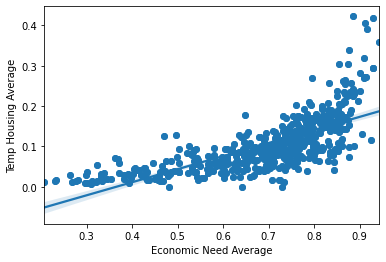

In [38]:
#Let's Plot the Findings
plt.scatter(y = hs_pov_df['Temp Housing Average'], 
            x = hs_pov_df['Economic Need Average'])

sns.regplot(y = hs_pov_df['Temp Housing Average'], 
            x = hs_pov_df['Economic Need Average'])

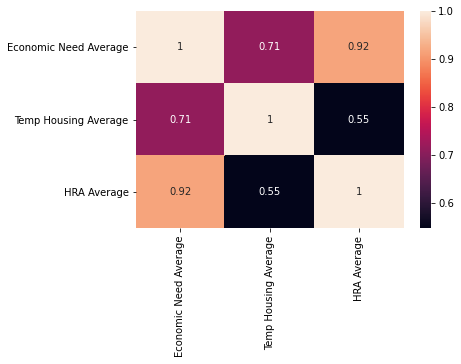

In [39]:
#General Look at How Correlations Trend
hs_pov_df_corr = hs_pov_df[['Economic Need Average', 'Temp Housing Average', 'HRA Average']].corr()
hs_pov_df_corr['Economic Need Average'].sort_values(ascending = False)

sns.heatmap(hs_pov_df_corr, 
            annot=True,
            xticklabels=hs_pov_df_corr.columns,
            yticklabels=hs_pov_df_corr.columns)

In [40]:
#Check over the Correlation Matrix
hs_pov_df_corr

,Economic Need Average,Temp Housing Average,HRA Average
Economic Need Average,1.000000,0.712625,0.917296
Temp Housing Average,0.712625,1.000000,0.546448
HRA Average,0.917296,0.546448,1.000000


**What we find:**

Economic Need Average Correlates strongly with Temp Housing (.71) and very strongly with HRA (.917)

Temp Housing Correlates with HRA Average, however it is a much weaker correlation (.546)

Correlations Ref: https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf

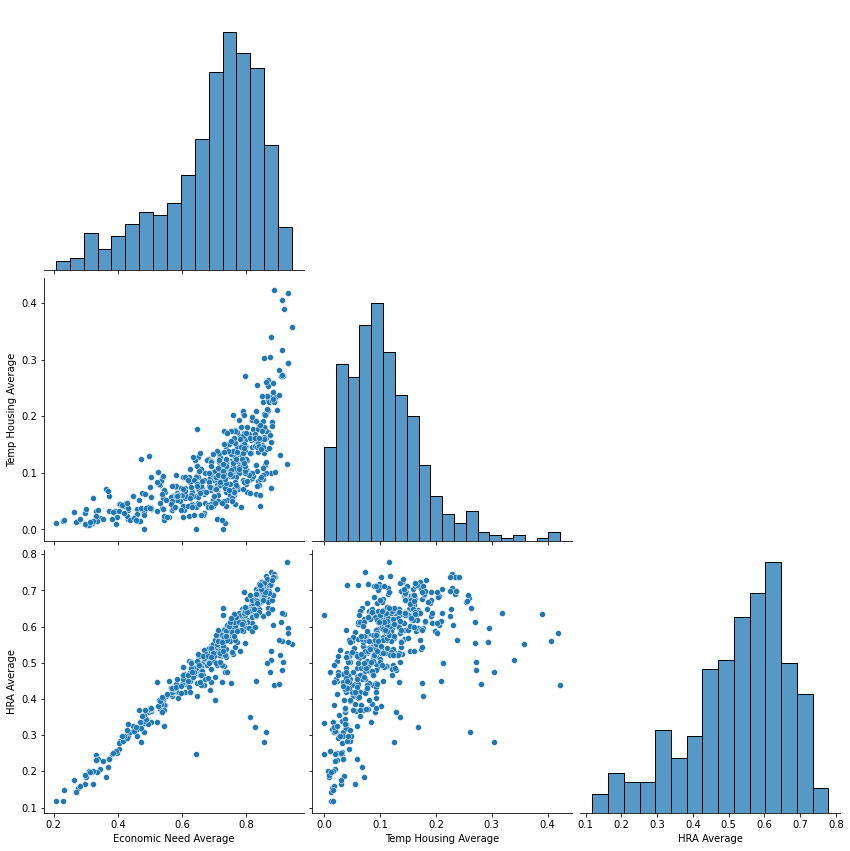

In [41]:
#Pairplot of the features we are looking for
sns.pairplot(full_df[['Economic Need Average', 'Temp Housing Average', 'HRA Average']],
             dropna = True,
             height = 4,
             corner = True)

- From the plots, we can see how strong the Economic Need to HRA average is (looks almost like a straight line). 
- Temp housing and HRA also have a relatively strong correlation.

In [42]:
full_df.columns

Index(['DBN', 'School Name_1415', 'School Type_1415', 'Enrollment_1415',
       'Rigorous Instruction Rating_1415',
       'Collaborative Teachers Rating_1415',
       'Supportive Environment Rating_1415',
       'Effective School Leadership Rating_1415',
       'Strong Family-Community Ties Rating_1415', 'Trust Rating_1415',
       ...
       'Percent Hispanic_1718', 'Percent White_1718',
       'Years of principal experience at this school_1718',
       'Percent of teachers with 3 or more years of experience_1718',
       'Student Attendance Rate_1718',
       'Percent of Students Chronically Absent_1718',
       'Teacher Attendance Rate_1718', 'Economic Need Average',
       'Temp Housing Average', 'HRA Average'],
      dtype='object', length=173)

In [43]:
hs_pov_df.head()

,DBN,Name,Type,Percent HRA Eligible_1415,Percent HRA Eligible_1516,Percent HRA Eligible_1617,Percent HRA Eligible_1718,Economic Need Index_1415,Economic Need Index_1516,Economic Need Index_1617,Economic Need Index_1718,Percent in Temp Housing_1415,Percent in Temp Housing_1516,Percent in Temp Housing_1617,Percent in Temp Housing_1718,Economic Need Average,Temp Housing Average,HRA Average
0,01M292,Henry Street School for International Studies,High School,0.663,0.638,0.621,0.813,0.832,0.881,0.832,0.898,0.190,0.225,0.200,0.205,0.86075,0.20500,0.68375
1,01M448,University Neighborhood High School,High School,0.599,0.548,0.538,0.738,0.812,0.771,0.757,0.825,0.263,0.198,0.173,0.189,0.79125,0.20575,0.60575
2,01M450,East Side Community School,High School,0.447,0.420,0.405,0.496,0.610,0.591,0.586,0.648,0.057,0.057,0.056,0.052,0.60875,0.05550,0.44200
3,01M509,Marta Valle High School,High School,0.595,0.643,0.618,0.743,0.767,0.794,0.767,0.823,0.149,0.154,0.142,0.162,0.78775,0.15175,0.64975
4,01M539,"New Explorations into Science, Technology and ...",High School,0.260,0.232,0.181,0.311,0.257,0.278,0.359,0.434,0.029,0.032,0.034,0.036,0.33200,0.03275,0.24600


Heatmap of data:
ref: https://seaborn.pydata.org/generated/seaborn.heatmap.html

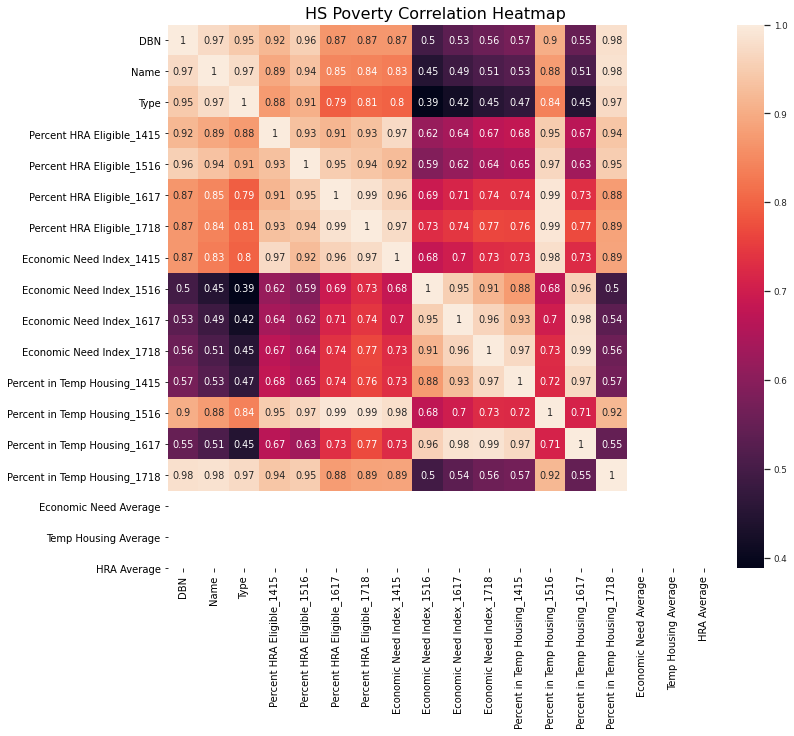

In [44]:
fig, ax = plt.subplots(figsize=(12,10))

ax.set_title("HS Poverty Correlation Heatmap", size = 16)

sns.set_theme()
sns.set(font_scale= .8)

sns.heatmap(hs_pov_df.corr(), 
            xticklabels=hs_pov_df.columns,
            yticklabels=hs_pov_df.columns,
            annot = True,
            cbar = True)

We see correlations, and strong correlations, with almost all of these poverty metrics.Students who live in temporary housing assistance would likely also be high on the economic need index, and qualify for HRA assistance.  

In the next section, when we see correlations in data, we can keep these in mind- with high correlations, are there noticable 'bad years' for higher poverty, temp housing, and economic need? Has it gotten worse?


In [45]:
hs_pov_df['Percent in Temp Housing_1415'].value_counts().sum()

491

## Graphing Trends in New York City High Schools
 Now, let's take a short look at how New York City High Schools have done for these three metrics in the past X years.

For HRA eligibility, % in Temporary Housing, and Economic Need, I'll:

1. Focus on each metric and Look at the data,
2. Look at the distribution of data
3. Attempt to make the data Gaussian/Normal with boxcot 
4. If the data looks OK, run a one-way ANOVA on the years, and if significant
5. After running the ANOVA, run a Tukey test to see where significant differences are, after ensuring good p-value using Bonferroni correction at p < .005 | slightly more conservative than for p=.05/4 =.0125.  
- *Ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6099145/#:~:text=The%20simplest%20way%20to%20adjust,length%20of%20the%20vector%20P_values).*
6. Try to draw some insight from what is shown from, compare and show means.

## a. Percent HRA Eligible
What percentage of High School students is HRA eligible (eligible for SNAP/Cash Assistance, etc.)?

#### Let's select the HRA data first
Since we really want to look for changes over time, the hra values, and drop the column.

In [46]:
#Focus DF, drop any nulls
hs_hra_df = hs_pov_df[hs_pov_df.columns[0:2].to_list() + ret_col(hs_pov_df, "hra")].dropna(axis = 0)
hs_hra_df.columns

Index(['DBN', 'Name', 'Percent HRA Eligible_1415', 'Percent HRA Eligible_1516',
       'Percent HRA Eligible_1617', 'Percent HRA Eligible_1718',
       'HRA Average'],
      dtype='object')

In [47]:
#Select Percent and Year
hra_melt_df =  hs_hra_df.melt(id_vars = ['DBN', 'Name'],
                                value_vars = ret_col(hs_hra_df, "percent hra"),
                                var_name = "HRA Percent Year",
                                value_name = 'Percent')

hra_melt_df.sample(5)

,DBN,Name,HRA Percent Year,Percent
642,11X249,Bronx Health Sciences High School,Percent HRA Eligible_1516,0.474
1337,84K356,Achievement First Crown Heights Charter School,Percent HRA Eligible_1617,0.266
460,01M448,University Neighborhood High School,Percent HRA Eligible_1516,0.548
785,24Q299,Bard High School Early College Queens,Percent HRA Eligible_1516,0.183
8,02M139,Stephen T. Mather Building Arts & Craftsmanshi...,Percent HRA Eligible_1415,0.575


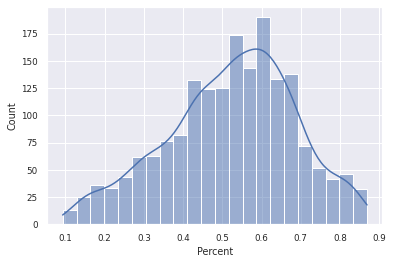

In [48]:
#What does the distribution look like?
sns.histplot(hra_melt_df.Percent, kde = True)

In [49]:
#Check for a Gaussian/Normal Distribution with D’Agostino’s K^2 Test
stat, p = scipy.stats.normaltest(hra_melt_df['Percent'], nan_policy = 'omit')

print((f"Test Stat: {stat}, \nP-value:{p}"))

# interpret
alpha = 0.05

if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Test Stat: 41.83927692630966, 
P-value:8.217059884371378e-10
Sample does not look Gaussian (reject H0)


This does not appear to be a normal distribution. 
We should try to normalize the data so that we can use an ANOVA. 

In [50]:
#Add a year column to make this easier to
hra_melt_df['Year'] = [2015 if '_1415' in elem else 
                       2016 if '_1516' in elem else 
                       2017 if '_1617' in elem else 
                       2018 if '_1718' else "" in elem 
                        for elem in hra_melt_df["HRA Percent Year"]]

Break data into different columns for ANOVA comparison

In [51]:
#Return function for separating years into groups
def sep_years(dataframe_, col = 'Percent'):
    return [dataframe_[['Year', col]].query("Year == 2015"), 
    dataframe_[['Year', col]].query("Year == 2016"), 
    dataframe_[['Year', col]].query("Year == 2017"), 
    dataframe_[['Year', col]].query("Year == 2018")]

Use *Scipy Stats Boxcot* to attempt to transform into a normal distribution:

*Ref*: 
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
- https://towardsdatascience.com/box-cox-transformation-explained-51d745e34203#:~:text=scipy.stats.boxcox(),the%2095%25%20confidence%20interval).


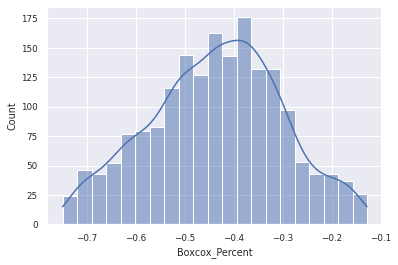

In [52]:
x = scipy.stats.boxcox(hra_melt_df['Percent'],1.27)
hra_melt_df['Boxcox_Percent'] = x 

#What does the distribution look like?
sns.histplot(hra_melt_df.Boxcox_Percent, kde = True)

Let's check to see if we were able to improve the data at all...

In [53]:
#D’Agostino’s K^2 Test
stat, p = scipy.stats.normaltest(hra_melt_df['Boxcox_Percent'], nan_policy = 'omit')

print((f"Test Stat: {stat}, \nP-value:{p}"))

# interpret
alpha = 0.05

if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Test Stat: 34.362126665730216, 
P-value:3.454291638238542e-08
Sample does not look Gaussian (reject H0)


It isn't perfectly normal, but it's somewhat closer than before (p-value within 1e-08 rather than 1e-10).Let's assume its a normal distribution (or as close as we can get here). 

**Note: This transform appears to bring us a lot closer than other methods (log/sqrt). I tested plotting np.log(x) /np.sqrt(x), and both were further off than before.**

In [54]:
hra_in_years = sep_years(hra_melt_df, 'Boxcox_Percent')

hra_2015 = hra_in_years[0]['Boxcox_Percent']
hra_2016 = hra_in_years[1]['Boxcox_Percent']
hra_2017 = hra_in_years[2]['Boxcox_Percent']
hra_2018 = hra_in_years[3]['Boxcox_Percent']

### Running an Anova and Tukey to see if there are statistical differences between years:
<blockquote>
- H0 = All years have an equal mean for the percentage of students who qualify for HRA assistance.
</blockquote>
<blockquote>
- H1 = Some years have different means of students who are eligible for HRA assistance. 
</blockquote>

Reference: https://www.youtube.com/watch?v=EWYzeZbchR0 (Python ANOVA)

**Notes:**

- 'Parametric' Anova Using Transform.
- The assumption is that the groups are truly independent. Per school, adding into the median and mean, we would see some of the same students across the 4 years. 

However, I am only looking to see if there are any significant changes between years, so this should act as a guide.

In [55]:
F, p = scipy.stats.f_oneway(hra_2015, hra_2016, hra_2017, hra_2018)
print('F Statistic=%.8f, p=%.200f' % (F, p))

alpha = 0.05

if p < alpha:
	print('Reject Null Hypothesis- Significant Difference in Means')
else:
	print('Keep Null Hypothesis- No Significant Difference')

F Statistic=196.88499482, p=0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001138901956327680300483960243701396176480853364725923205163118295065397190088259435245924732
Reject Null Hypothesis- Significant Difference in Means


Let's take a deeper look at how each year compares with the other years. We'll use a Tukey Test for significance to check group comparisons here.

Ref: "Python for Data Analysis: ANOVA" https://www.youtube.com/watch?v=EWYzeZbchR0

In [56]:
#Using Statsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = hra_melt_df['Boxcox_Percent'],
                          groups = hra_melt_df['Year'],
                          alpha = .001)

tukey.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


group1,group2,meandiff,p-adj,lower,upper,reject
2015,2016,-0.0163,0.1479,-0.0454,0.0127,False
2015,2017,-0.0345,0.001,-0.0635,-0.0054,True
2015,2018,0.1337,0.001,0.1046,0.1627,True
2016,2017,-0.0181,0.0882,-0.0472,0.0109,False
2016,2018,0.15,0.001,0.121,0.1791,True
2017,2018,0.1681,0.001,0.1391,0.1972,True


In [57]:
hra_melt_df[["Year","Percent"]].groupby("Year").agg(["mean", "median", np.std, np.var])

Percent                           
          mean median       std       var
Year                                     
2015  0.499163  0.521  0.139024  0.019328
2016  0.479052  0.502  0.140572  0.019761
2017  0.456407  0.480  0.142966  0.020439
2018  0.654268  0.686  0.153823  0.023662

- In this case, we can assume that there is a significant difference per year in change of mean number of students. 

- 2018 showed significant differences from all other groups. 2017 also showed a significant difference between itself and 2015, but not 2016.

Here we see it, obvious and clear. 2018 had a far higher rate of HRA-qualifying students than any other year. This is doubly unfortunate because of the downward trend previously- 2017 was actually a record-low year compared to 2015 for HRA qualification. 

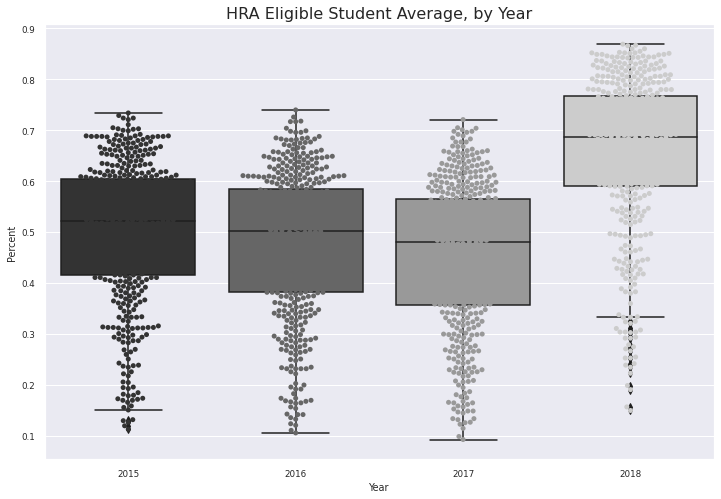

In [58]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_title("HRA Eligible Student Average, by Year", size = 16)

sns.set_theme()
sns.set(font_scale= 1)

sns.boxplot(x = 'Year', 
            y = 'Percent',  
            data = hra_melt_df,
            palette = 'gist_gray')

sns.swarmplot(x = 'Year', 
              y = 'Percent', 
              data = hra_melt_df,
              palette = 'gist_gray')  

There was a small down trend in student eligibility for HRA assitance from 2015 to 2017, but a big uptrend in 2018. 

## b. Temp Housing Average
What percentage of High School students live in temporary housing?

In [59]:
#Focus DF to Temp Housing
temp_housing_df = hs_pov_df[hs_pov_df.columns[0:2].to_list() + ret_col(hs_pov_df, "percent in temp housing")].dropna(axis = 0)

temp_mlt_df =  temp_housing_df.melt(id_vars = ['DBN', 'Name'],
                                value_vars = ret_col(temp_housing_df, "percent in temp housing"),
                                var_name = "Temp Housing Percent Year",
                                value_name = 'Percent')

#Add a year column to make this easier to graph
temp_mlt_df['Year'] = [2015 if '_1415' in elem else 
                       2016 if '_1516' in elem else 
                       2017 if '_1617' in elem else 
                       2018 if '_1718' else "" in elem 
                        for elem in temp_mlt_df["Temp Housing Percent Year"]]

temp_mlt_df.head()

,DBN,Name,Temp Housing Percent Year,Percent,Year
0,01M292,Henry Street School for International Studies,Percent in Temp Housing_1415,0.190,2015
1,01M448,University Neighborhood High School,Percent in Temp Housing_1415,0.263,2015
2,01M450,East Side Community School,Percent in Temp Housing_1415,0.057,2015
3,01M509,Marta Valle High School,Percent in Temp Housing_1415,0.149,2015
4,01M539,"New Explorations into Science, Technology and ...",Percent in Temp Housing_1415,0.029,2015


### Distribution, Normalization, ANOVA, and Graphs
Let's look at the distribution of % of students in temporary housing, and try to transform the data, if possible.

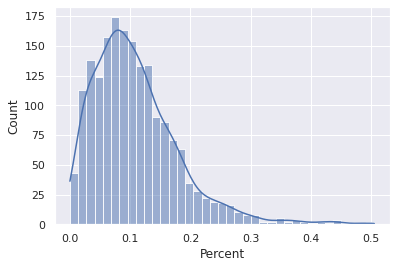

In [60]:
#What does the distribution look like?
sns.histplot(temp_mlt_df.Percent, kde = True)

This is not a normal distribution at all. 
Many schools appear to have about 10% of students who qualify for temporary housing. Let's try to transform with a boxcox again.

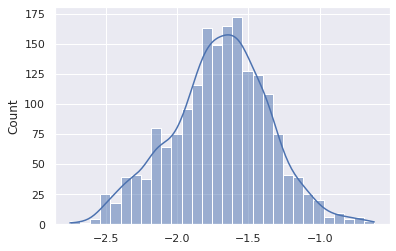

In [61]:
x = scipy.stats.boxcox([.01 if elem == 0 else elem for elem in temp_mlt_df['Percent'].to_list()], lmbda = .3)
sns.histplot(x, kde = True)

temp_mlt_df['Boxcox_Percent'] = x

In [62]:
#D’Agostino’s K^2 Test
stat, p = scipy.stats.normaltest(temp_mlt_df['Boxcox_Percent'], nan_policy = 'omit')

print((f"Test Stat: {stat}, \nP-value:{p}"))

# interpret
alpha = 0.05

if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Test Stat: 3.5107490877828615, 
P-value:0.17284249306680213
Sample looks Gaussian (fail to reject H0)


Success with Boxcox! We should be able to use this. 

In [63]:
#Create individual comparison groups by year
temp_in_years = sep_years(temp_mlt_df, 'Boxcox_Percent')

temp_2015 = temp_in_years[0]['Boxcox_Percent']
temp_2016 = temp_in_years[1]['Boxcox_Percent']
temp_2017 = temp_in_years[2]['Boxcox_Percent']
temp_2018 = temp_in_years[3]['Boxcox_Percent']

### Running an Anova and Tukey to see if there are statistical differences between years:
<blockquote>
- H0 = All years have an equal mean for the percentage of students who are in temporary housing in NYC.
</blockquote>
<blockquote>
- H1 = Some years have different means for the percentage of students who are in temporary housing in NYC.
</blockquote>

**Notes:**

- 'Parametric' Anova Using Transform. This data was able to be transformed into a Gaussian distribution, so it should hold up well.
- The assumption is that the groups are truly independent. Per school, adding into the median and mean, we would see some of the same students across the 4 years. However, the observations should be independent.


In [64]:
#Run Anova and Check P-value
F, p = scipy.stats.f_oneway(temp_2015, temp_2016, temp_2017, temp_2018)
print('F Statistic=%.8f, p=%.50f' % (F, p))

alpha = 0.005

if p < alpha:
	print('Reject Null Hypothesis- Significant Difference in Means')
else:
	print('Keep Null Hypothesis- No Significant Difference')

F Statistic=11.01627860, p=0.00000036131876301737647881335679239667157958137977
Reject Null Hypothesis- Significant Difference in Means


The P-value here is significant, but it's much closer than the other two (economic need/HRA assistance). 

In [65]:
#Run Tukey Test to find where the differences are
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = temp_mlt_df['Boxcox_Percent'],
                          groups = temp_mlt_df['Year'],
                          alpha = .005)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
2015,2016,0.0429,0.2257,-0.0319,0.1178,False
2015,2017,0.0864,0.001,0.0115,0.1613,True
2015,2018,0.1219,0.001,0.047,0.1968,True
2016,2017,0.0434,0.2169,-0.0315,0.1183,False
2016,2018,0.0789,0.0026,0.0041,0.1538,True
2017,2018,0.0355,0.3932,-0.0394,0.1104,False


There is a significant difference between years, although the p-value here was much greater than in the other two instances. 

- 2018 (x̄ = .12) showed significant differences from 2015 (x̄ = .095) and 2016 (x̄ = .10), but not 2017 (x̄ = .11). It was significantly higher than 15/16.
- 2017 showed a difference between 2015 and 2017. 
- 2015 had significantly lower mean for students in temporary housing for students in NYC Public Schools.

In [66]:
temp_mlt_df[["Year","Percent"]].groupby("Year").agg(["mean", "median", np.std, np.var])

Percent                           
          mean median       std       var
Year                                     
2015  0.094824  0.082  0.062840  0.003949
2016  0.104174  0.091  0.069279  0.004800
2017  0.113547  0.103  0.074282  0.005518
2018  0.121035  0.112  0.077169  0.005955

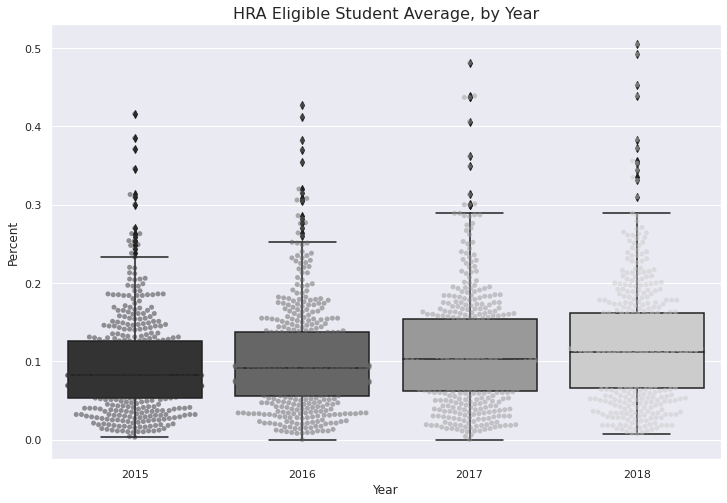

In [67]:
# Plot of the HRA Student Eligibility
fig, ax = plt.subplots(figsize=(12,8))

ax.set_title("HRA Eligible Student Average, by Year", size = 16)

sns.set_theme()
sns.set(font_scale= 1)

sns.boxplot(x = 'Year', 
            y = 'Percent',  
            data = temp_mlt_df,
            palette = 'gist_gray')

sns.swarmplot(x = 'Year', 
              y = 'Percent',
              alpha = .5, 
              data = temp_mlt_df,
              palette = 'gist_gray')

## c. Economic Need Index
What percent of students are qualified as having 'Economic Need'?

In [68]:
[col for col in hs_pov_df.columns if "economic need" in col.lower()]

['Economic Need Index_1415',
 'Economic Need Index_1516',
 'Economic Need Index_1617',
 'Economic Need Index_1718',
 'Economic Need Average']

In [69]:
#One Step (See previous)
econ_need_df = hs_pov_df[hs_pov_df.columns[0:2].to_list() + ret_col(hs_pov_df, "economic need index")].dropna(axis = 0)

econ_mlt_df =  econ_need_df.melt(id_vars = ['DBN', 'Name'],
                                value_vars = ret_col(econ_need_df, "economic need index"),
                                var_name = "Economic Need Percent Year",
                                value_name = 'Percent')

#Add a year column to make this easier to graph
econ_mlt_df['Year'] = [2015 if '_1415' in elem else 
                       2016 if '_1516' in elem else 
                       2017 if '_1617' in elem else 
                       2018 if '_1718' else "" in elem 
                        for elem in econ_mlt_df["Economic Need Percent Year"]]

econ_mlt_df.head()

,DBN,Name,Economic Need Percent Year,Percent,Year
0,01M292,Henry Street School for International Studies,Economic Need Index_1415,0.832,2015
1,01M448,University Neighborhood High School,Economic Need Index_1415,0.812,2015
2,01M450,East Side Community School,Economic Need Index_1415,0.610,2015
3,01M509,Marta Valle High School,Economic Need Index_1415,0.767,2015
4,01M539,"New Explorations into Science, Technology and ...",Economic Need Index_1415,0.257,2015


### Distribution, Normalization, ANOVA, and Graphs

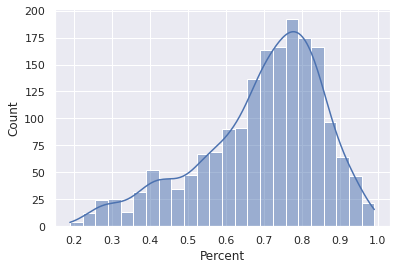

In [70]:
#What does the distribution look like?
sns.histplot(econ_mlt_df.Percent, kde = True)

Again, not a normal distribution. It looks like schools hover around the 75% mark for qualifying for economic need. Again, let's try for a boxcox transform.

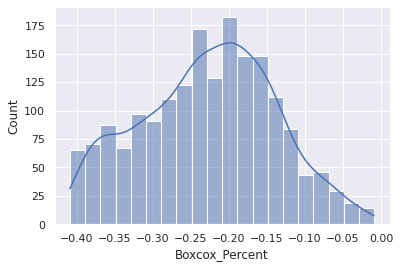

In [71]:
x = scipy.stats.boxcox(econ_mlt_df['Percent'], 2.4)
econ_mlt_df['Boxcox_Percent'] = pd.Series(x)

sns.histplot(econ_mlt_df['Boxcox_Percent'], kde = True)

In [72]:
#D’Agostino’s K^2 Test
stat, p = scipy.stats.normaltest(econ_mlt_df['Boxcox_Percent'], nan_policy = 'omit')

print((f"Test Stat: {stat}, \nP-value:{p}"))

# interpret
alpha = 0.05

if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Test Stat: 68.48132541301197, 
P-value:1.3473149532604872e-15
Sample does not look Gaussian (reject H0)


This data isn't perfectly Gaussian, but I'll make the assumption that it is here.

### Running an Anova and Tukey to see if there are statistical differences between years:
<blockquote>
- H0 = All years have an equal means of students who qualify for economic need assistance (as an index).
</blockquote>
<blockquote>
- H1 = Some years have different means of students who qualify for economic need assistance (as an index).
</blockquote>

**Notes:**

- 'Parametric' Anova Using Transform. This data was able to be transformed into a Gaussian distribution, so it should hold up well.
- The assumption is that the groups are truly independent. Per school, adding into the median and mean, we would see some of the same students across the 4 years. 

In [73]:
econ_in_years = sep_years(econ_mlt_df, 'Boxcox_Percent')

en_2015 = econ_in_years[0]['Boxcox_Percent']
en_2016 = econ_in_years[1]['Boxcox_Percent']
en_2017 = econ_in_years[2]['Boxcox_Percent']
en_2018 = econ_in_years[3]['Boxcox_Percent']

F, p = scipy.stats.f_oneway(en_2015, en_2016, en_2017, en_2018)
print('F Statistic=%.8f, p=%.50f' % (F, p))

alpha = 0.05

if p < alpha:
	print('Reject Null Hypothesis- Significant Difference in Means')
else:
	print('Keep Null Hypothesis- No Significant Difference')

F Statistic=57.78196455, p=0.00000000000000000000000000000000001093355780622788
Reject Null Hypothesis- Significant Difference in Means


Let's take a deeper look at how each year compares with the other years. We'll use a Tukey test to check group comparisons here.

Ref: "Python for Data Analysis: ANOVA" https://www.youtube.com/watch?v=EWYzeZbchR0


In [74]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = econ_mlt_df['Boxcox_Percent'],
                          groups = econ_mlt_df['Year'],
                          alpha = .001)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
2015,2016,0.012,0.1381,-0.009,0.033,False
2015,2017,0.0031,0.9,-0.0179,0.0241,False
2015,2018,0.0642,0.001,0.0432,0.0852,True
2016,2017,-0.0089,0.3804,-0.0299,0.0121,False
2016,2018,0.0522,0.001,0.0312,0.0732,True
2017,2018,0.0611,0.001,0.0401,0.0821,True


In [75]:
econ_mlt_df[["Year","Percent"]].groupby("Year").agg(["mean", "median", np.std, np.var])

Percent                           
          mean median       std       var
Year                                     
2015  0.663033  0.706  0.152177  0.023158
2016  0.680532  0.714  0.161977  0.026237
2017  0.664867  0.692  0.162870  0.026527
2018  0.764551  0.798  0.152411  0.023229

- There is a significant difference, and 2018 shows a significant difference between itself and any of the other groups (x̄ = .76). 
- None of the other years showed a significant difference. 

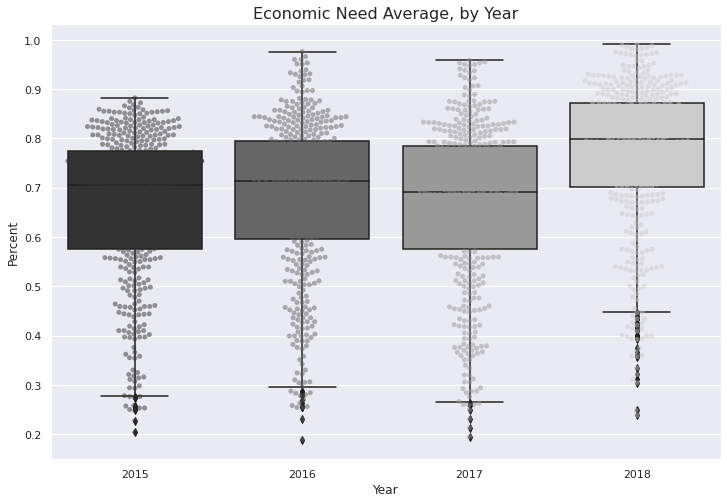

In [76]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_title("Economic Need Average, by Year", size = 16)

sns.set_theme()
sns.set(font_scale= 1)

sns.boxplot(x = 'Year', 
            y = 'Percent',  
            data = econ_mlt_df,
            palette = 'gist_gray')

sns.swarmplot(x = 'Year', 
              y = 'Percent',
              alpha = .5, 
              data = econ_mlt_df,
              palette = 'gist_gray')

## d. Boxplot Graphs for all years of comparison
Taking a final look at the three categories here.

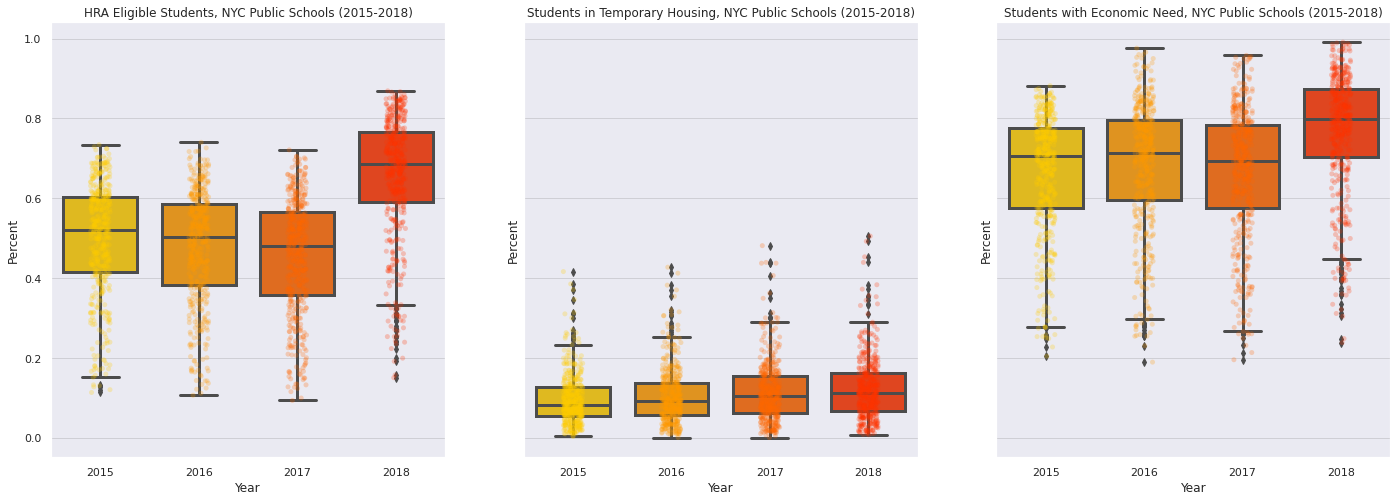

In [77]:
fig, ax = plt.subplots(1,3,figsize=(24,8),sharex=True, sharey=True)
sns.set_theme()
sns.set(font_scale= 1)

pov_dfs = [hra_melt_df, temp_mlt_df, econ_mlt_df]
pov_titles = ["HRA Eligible Students", "Students in Temporary Housing", "Students with Economic Need"]

for i in range(0,3):
    ax[i].set_title(f"{pov_titles[i]}, NYC Public Schools (2015-2018)", size = 12)
    ax[i].grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)
    
    sns.boxplot(x = 'Year', 
                y = 'Percent',  
                data = pov_dfs[i],
                width = .75,
                linewidth = 3,
                palette = 'autumn_r',
                ax = ax[i])

    sns.stripplot(x = 'Year', 
                y = 'Percent',
                alpha = .25, 
                data = pov_dfs[i],
                palette = 'autumn_r',
                ax = ax[i])

There are some small trends that we can see, but what we clearly see from all three years is that all three metrics of poverty have increased in 2018. In the case of HRA eligible students, there was a drastic increase. 

# 2. Second Dataset: All Poverty
 A Look at general poverty statistics in New York City
(df_all_poverty)

## Load Second Dataset: All Schools and Poverty Percentage

New York Open Data Portal, Education Reports for High Schools.

The first dataset is a dataset of all schools in New York, and has data on % Poverty and Economic Need.

| Year | Data Source |  
|---|---|  
| All Years | https://data.cityofnewyork.us/api/views/nie4-bv6q/rows.csv?accessType=DOWNLOAD | |

In [78]:
#All Poverty Df (14-20)
df_all_poverty = df_allpov = pd.read_csv('https://data.cityofnewyork.us/api/views/nie4-bv6q/rows.csv?accessType=DOWNLOAD')

In [79]:
df_all_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9096 entries, 0 to 9095
Data columns (total 39 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   DBN                                         9096 non-null   object 
 1   School Name                                 9096 non-null   object 
 2   Year                                        9096 non-null   object 
 3   Total Enrollment                            9096 non-null   int64  
 4   Grade 3K+PK (Half Day & Full Day)           9096 non-null   int64  
 5   Grade K                                     9096 non-null   int64  
 6   Grade 1                                     9096 non-null   int64  
 7   Grade 2                                     9096 non-null   int64  
 8   Grade 3                                     9096 non-null   int64  
 9   Grade 4                                     9096 non-null   int64  
 10  Grade 5     

In [80]:
#All Poverty Df (14-20)
df_all_poverty = df_allpov = pd.read_csv('https://data.cityofnewyork.us/api/views/nie4-bv6q/rows.csv?accessType=DOWNLOAD')

In [81]:
df_all_poverty.head()

,DBN,School Name,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,18,0,0,0,0,0,0,0,83,0.472,93,0.528,9,0.051,57,0.324,105,0.597,3,0.017,2,0.011,60,0.341,16,0.091,149,84.7%,88.9%
1,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,18,0,0,0,0,0,0,0,83,0.466,95,0.534,14,0.079,51,0.287,105,0.590,4,0.022,4,0.022,51,0.287,12,0.067,152,85.4%,88.2%
2,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,26,0,0,0,0,0,0,0,99,0.521,91,0.479,20,0.105,52,0.274,110,0.579,2,0.011,6,0.032,49,0.258,8,0.042,161,84.7%,89.0%
3,01M015,P.S. 015 Roberto Clemente,2018-19,174,13,20,33,30,30,20,28,0,0,0,0,0,0,0,85,0.489,89,0.511,24,0.138,48,0.276,95,0.546,1,0.006,6,0.034,39,0.224,8,0.046,147,84.5%,88.8%
4,01M015,P.S. 015 Roberto Clemente,2019-20,190,14,29,28,38,33,29,19,0,0,0,0,0,0,0,94,0.495,96,0.505,27,0.142,56,0.295,96,0.505,2,0.011,9,0.047,44,0.232,17,0.089,155,81.6%,86.9%


## To fix this information, we should do a few things 
-Convert all decimals to percents  
-Change Above 95 and Below 5 to 95 and 5, respectively (no way to know either way how close we get)  
-Change all to float  
-Check again for nulls  

In [82]:
df_all_poverty['% Poverty'].value_counts()

Above 95%             896
86.5%                  42
92.6%                  40
83.0%                  40
81.1%                  39
                     ... 
0.8632218837738037      1
0.7111801505088806      1
0.7647058963775635      1
0.8441860675811768      1
23.0%                   1
Name: % Poverty, Length: 957, dtype: int64

**We see a big issue here-**
- some of the schools are coded as strings, 
- some of the variables are coded as decimals, 
- and some of the variables are coded regularly.

In [83]:
#Replace %s so that numbers can be converted to string
pov_list = [num.replace("%","") for num in df_all_poverty['% Poverty'].to_list()]

In [84]:
pov_fixed = []

for elem in pov_list:
    try:
        elem = float(elem)

        if elem <= 1:
            elem = round(elem*100,1) #Convert dec to %

#This is a simple estimator, but I'll split the difference between the under threshold and minimum/max values
    except:
        if elem == 'Above 95':
            elem = 97.5
        elif elem == 'Below 5':
            elem = 2.5
    
    pov_fixed.append(elem)

In [85]:
df_all_poverty['Adjusted Poverty'] = pov_fixed

In [86]:
#Finally, we can aggregate our data here to look at the real poverty numbers
df_all_poverty[['Year','Adjusted Poverty']].groupby('Year', as_index = False).agg(['mean', 'median', max, min]).reset_index()

Year Adjusted Poverty                  
                       mean median   max  min
0  2015-16        73.814848   78.4  97.5  2.5
1  2016-17        73.491421   78.4  97.5  2.5
2  2017-18        78.347163   84.1  97.5  5.6
3  2018-19        77.318478   82.8  97.5  6.0
4  2019-20        76.629872   82.5  97.5  5.6

## Correlations in Adjusted Poverty
Next, let's take a look at how poverty correlates to the other factors here.

In [87]:
corr_matrix = df_all_poverty.corr()
corr_matrix['Adjusted Poverty'].sort_values(ascending = True)[0:10]

% White                                      -0.776822
# White                                      -0.530194
% Multiple Race Categories Not Represented   -0.401660
# Multiple Race Categories Not Represented   -0.377542
% Asian                                      -0.269670
# Asian                                      -0.174989
# Female                                     -0.165647
Grade K                                      -0.160146
Total Enrollment                             -0.157761
Grade 1                                      -0.143886
Name: Adjusted Poverty, dtype: float64

It appears from our sample that race has some of the highest negative correlations to adjusted poverty (as X increases, poverty decreases).

## Graph and Visualize Poverty Statistics

- Change the 'Year' to being a numerical variable

In [88]:
#What type are years stored as?
df_all_poverty.Year.dtypes

dtype('O')

In [89]:
#How many schools do we have for each year?
df_all_poverty.Year.value_counts()

2019-20    1868
2018-19    1840
2017-18    1815
2016-17    1795
2015-16    1778
Name: Year, dtype: int64

- Thankfully, there are no weird elements here. 
- So, we'll need to create a function to isolate and return starting years, so that we can plot them later.

In [90]:
def years_convert(year):
    year = year.split("-")
    try:
        year = int(str("20" + year[1]))
    except:
        pass
    return year

In [91]:
years_convert('2015-16')

2016

In [92]:
#Apply values to a new column
df_all_poverty['Year_start'] = df_all_poverty['Year'].apply(years_convert)

In [93]:
#Check to make sure that it worked
df_all_poverty[['Year','Year_start']].head()

,Year,Year_start
0,2015-16,2016
1,2016-17,2017
2,2017-18,2018
3,2018-19,2019
4,2019-20,2020


### Graphing Poverty Rates in Public Schools  
Histogram of the poverty rates in public schools:

**ref:** https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib?rq=1

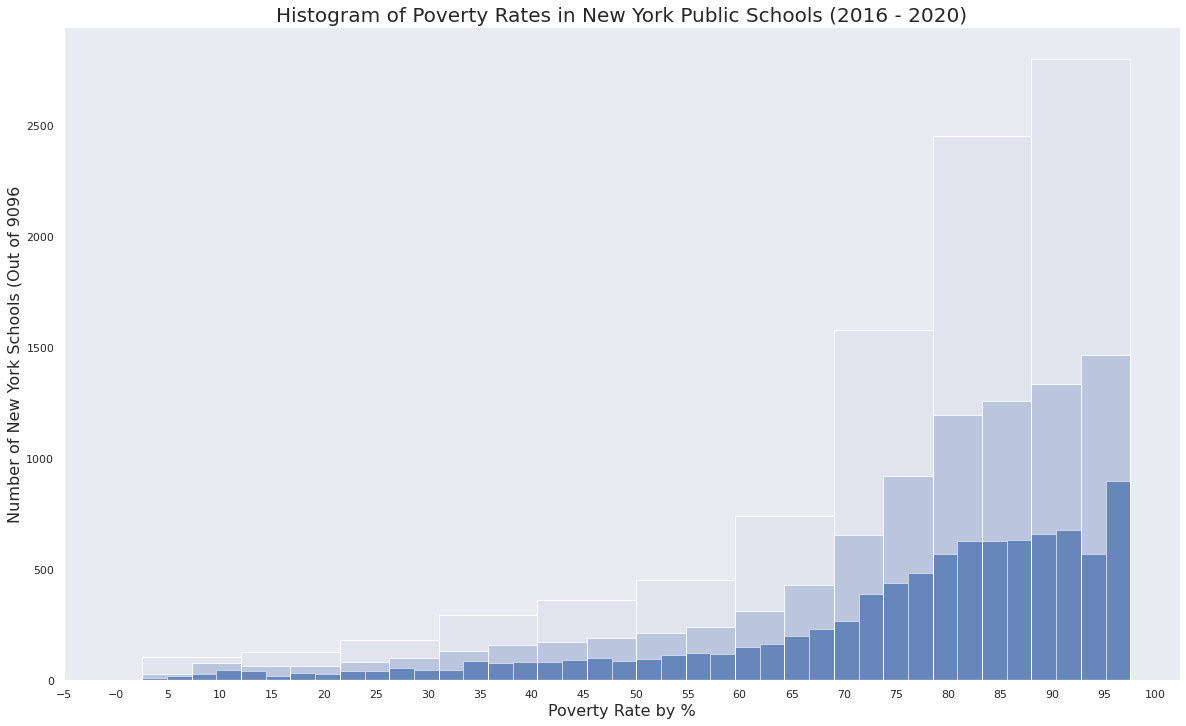

In [94]:
fig, ax = plt.subplots(1, figsize = (20,12), sharex = True, sharey = True)
sns.set_theme()

sns.histplot(x = df_all_poverty['Adjusted Poverty'], bins = 40)
sns.histplot(x = df_all_poverty['Adjusted Poverty'], alpha = .25, bins = 20)
sns.histplot(x = df_all_poverty['Adjusted Poverty'], alpha = .05, bins = 10)

#Labels and Graphics
ax.set_title(f"Histogram of Poverty Rates in New York Public Schools ({min(df_all_poverty.Year_start)} - {max(df_all_poverty.Year_start)})", size = 20 )
ax.set_xlabel(f"Poverty Rate by %", size = 16)
ax.set_ylabel(f"Number of New York Schools (Out of {len(df_all_poverty)}", size = 16)
ax.grid()

start, end = ax.get_xlim()
stepsize = 5
ax.xaxis.set_ticks(np.arange(start-2.8, end, stepsize))

#ax.grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)
sns.despine()

*Note:* This histogram is a little deceptive because of the encoding any 'higher than 95' as being 95. Regardless, there are a huge number of schools in the New York City school systems with poverty rates that are at least 95%.

Alpha for Boxplot
ref: https://github.com/mwaskom/seaborn/issues/979

New York High Schools show an exponential increasing trend- the number of schools that have higher poverty increases in likelihood the higher the poverty rate increases. In New York High Schools, poverty is very high above 90%.

### Plotting High School Poverty Rates by Year
- What do poverty rates in New York Schools look like, by year?  
- How have they changed over the last 5 years?

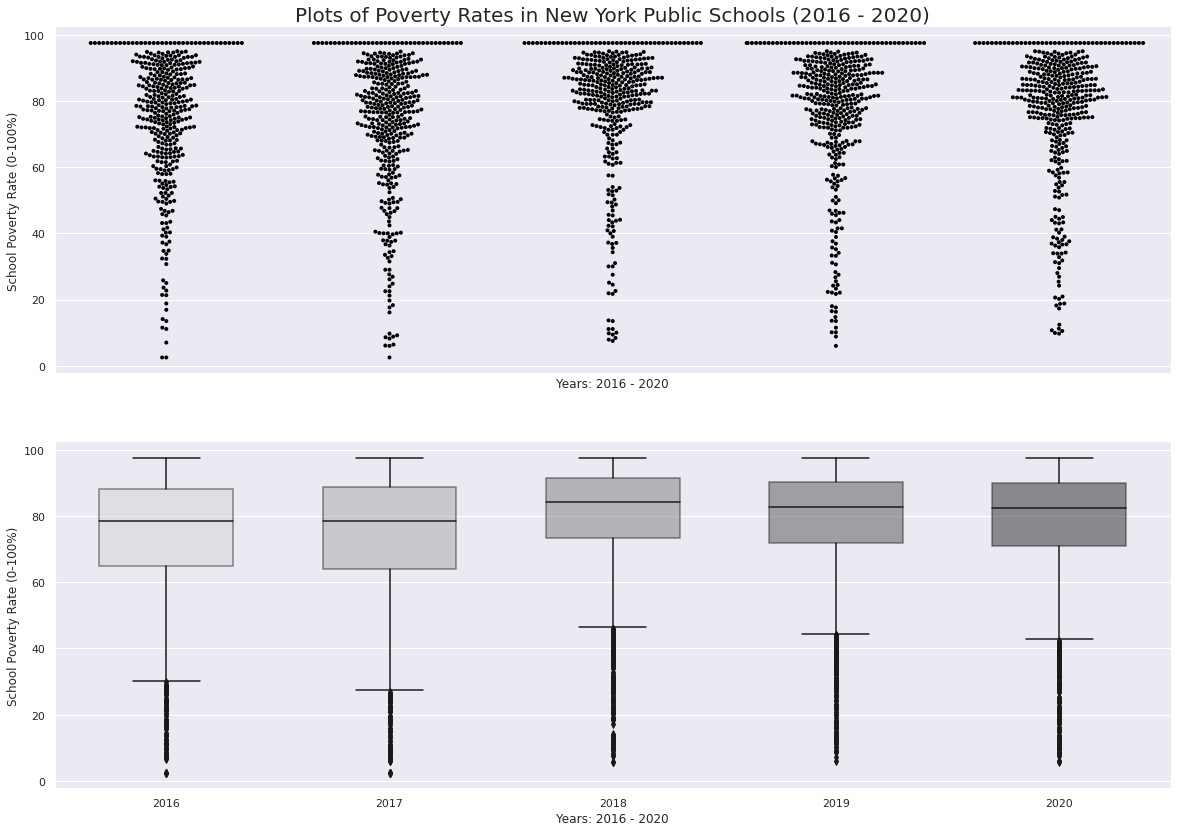

In [95]:
#Set sample size for data (Currently set at half)
sample_size = int(round(len(df_all_poverty) / 2, 0))
sns.set_theme()

df_sample = df_all_poverty.sample(sample_size) #Samples because seaborn limits number of dots

#Plot the data
fig, axs = plt.subplots(2, figsize = (20,14), sharex = True, sharey = True)

sns.swarmplot(x = 'Year_start', 
              y = 'Adjusted Poverty',
              data = df_all_poverty.sample(2000), 
              size = 4,
              alpha = 1,
              color = 'black',
              ax = axs[0])

sns.boxplot(x = 'Year_start', 
            y = 'Adjusted Poverty',
            data = df_all_poverty,
            color = 'black',
            palette = 'gray_r',
            width = .6,
            boxprops=dict(alpha=.5),
            ax = axs[1])

#Labels and Graphics
for i in range(0,2):
    axs[0].set_title(f"Plots of Poverty Rates in New York Public Schools ({min(df_all_poverty.Year_start)} - {max(df_all_poverty.Year_start)})", size = 20 )
    axs[i].set_xlabel(f"Years: {min(df_all_poverty.Year_start)} - {max(df_all_poverty.Year_start)}", size = 12)
    axs[i].set_ylabel("School Poverty Rate (0-100%)", size = 12)

ax.grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)
sns.despine()

- What is interesting here is that we do not see the same pattern forming from the information that we saw from High School students. 
- 2018 does not appear to be significantly different here than other years.

In [96]:
#Aggregate Statics for Adjusted Poverty
df_all_poverty[['Year_start','Adjusted Poverty']].groupby('Year_start').agg(['mean','median', np.var, np.std, min,max])

Adjusted Poverty                                         
                       mean median         var        std  min   max
Year_start                                                          
2016              73.814848   78.4  393.282852  19.831360  2.5  97.5
2017              73.491421   78.4  418.994375  20.469352  2.5  97.5
2018              78.347163   84.1  373.560421  19.327711  5.6  97.5
2019              77.318478   82.8  367.414003  19.168046  6.0  97.5
2020              76.629872   82.5  377.371276  19.426046  5.6  97.5

There is a huge range of schools in terms of poverty rates. They seem to span the full spectrum of 0-100% (although adjusted here). However, many more schools are clustered around high poverty than low poverty. Just from the swarmplot and boxplot, it is pretty clear that schools in New York have high levels of adjusted poverty. 

In [97]:
df_adj_pov_sml = df_all_poverty[['DBN', 'School Name', 'Year_start', 'Adjusted Poverty']]

In [98]:
df_adj_pov_sml

,DBN,School Name,Year_start,Adjusted Poverty
0,01M015,P.S. 015 Roberto Clemente,2016,84.7
1,01M015,P.S. 015 Roberto Clemente,2017,85.4
2,01M015,P.S. 015 Roberto Clemente,2018,84.7
3,01M015,P.S. 015 Roberto Clemente,2019,84.5
4,01M015,P.S. 015 Roberto Clemente,2020,81.6
...,...,...,...,...
9091,84X730,Bronx Charter School for the Arts,2016,83.0
9092,84X730,Bronx Charter School for the Arts,2017,73.4
9093,84X730,Bronx Charter School for the Arts,2018,82.2
9094,84X730,Bronx Charter School for the Arts,2019,84.4


In [99]:
#Adjusted years_separation function
def sep_years_1620(dataframe_, cola = "Year_start", colb = 'Adjusted Poverty'):
    return [dataframe_[[cola, colb]].query("Year_start == 2016"), 
    dataframe_[[cola, colb]].query("Year_start == 2017"), 
    dataframe_[[cola, colb]].query("Year_start == 2018"), 
    dataframe_[[cola, colb]].query("Year_start == 2019"),
    dataframe_[[cola, colb]].query("Year_start == 2020")]

#Assign to different lists
adj_pov_sep = sep_years_1620(df_adj_pov_sml, 'Year_start', "Adjusted Poverty")

adj_2016 = adj_pov_sep[0]
adj_2017 = adj_pov_sep[1]
adj_2018 = adj_pov_sep[2]
adj_2019 = adj_pov_sep[3]
adj_2020 = adj_pov_sep[4]

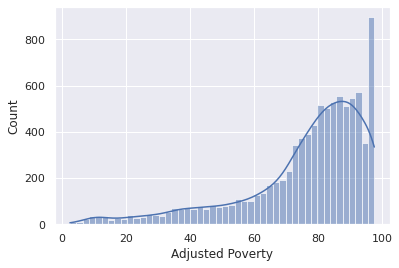

In [100]:
#What does the distribution look like?
sns.histplot(df_adj_pov_sml['Adjusted Poverty'], kde = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Boxcox Transform')

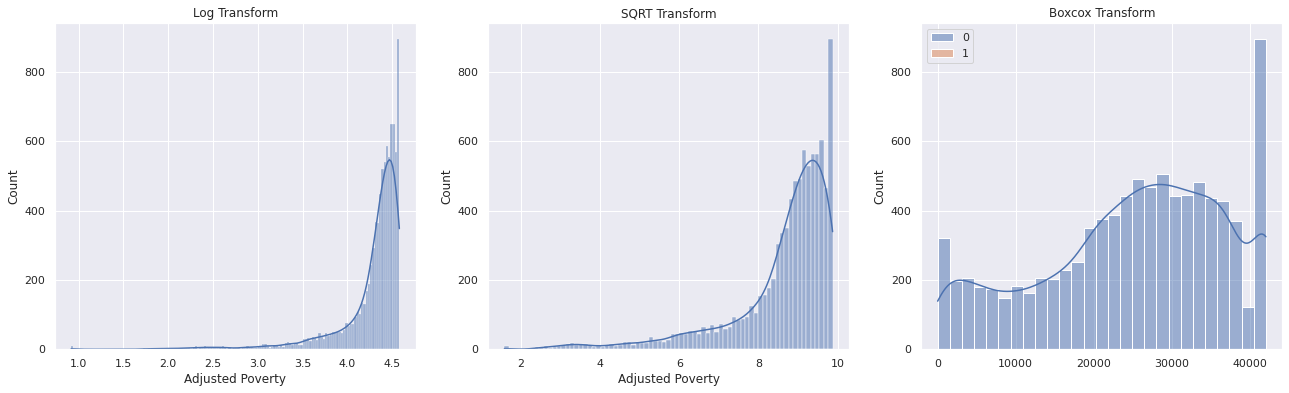

In [101]:
#Can we transform the data?
fig, ax = plt.subplots(1,3, figsize=(22,6))

sns.histplot(np.log(df_adj_pov_sml['Adjusted Poverty']), kde = True, ax = ax[0])
sns.histplot(np.sqrt(df_adj_pov_sml['Adjusted Poverty']), kde = True, ax = ax[1])
sns.histplot(scipy.stats.boxcox(df_adj_pov_sml['Adjusted Poverty']), kde = True, ax = ax[2])

ax[0].set_title("Log Transform")
ax[1].set_title("SQRT Transform")
ax[2].set_title("Boxcox Transform")

None of these transforms (log, sqrt, boxcox) are effective. The transformed distribution has a lot of issues approaching normal with the huge amount of students who are at 95%+ poverty here. 

Since we cannot change this to a normal distribution, I will end my analysis here and not run significance tests.

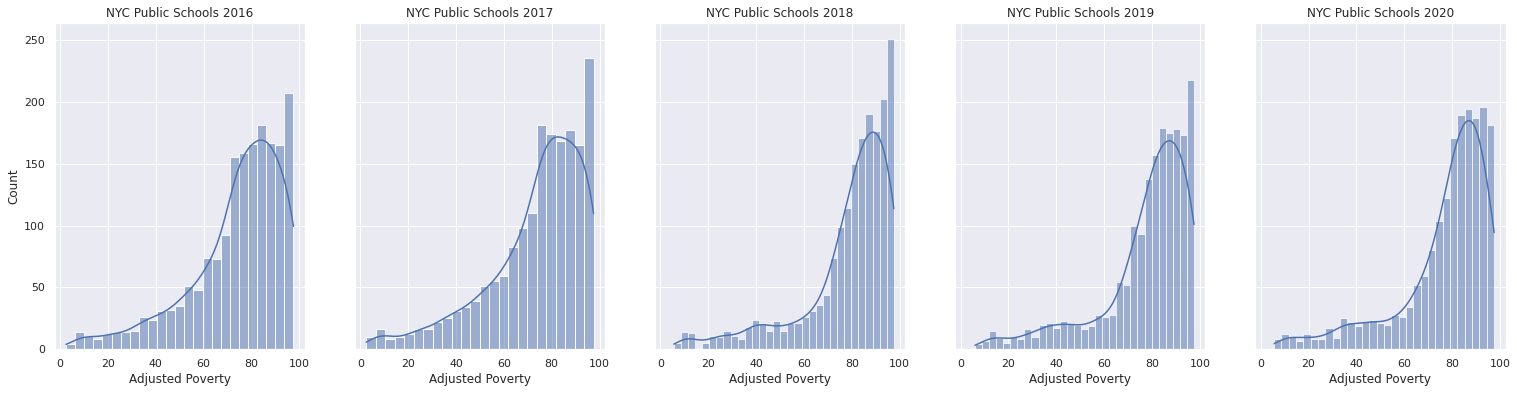

In [106]:
#Look at separate distributions here
fig, ax = plt.subplots(1,5, figsize=(26,6), sharex = True, sharey = True)

sns.histplot(adj_2016['Adjusted Poverty'], ax = ax[0],  kde = True)
sns.histplot(adj_2017['Adjusted Poverty'], ax = ax[1],  kde = True)
sns.histplot(adj_2018['Adjusted Poverty'], ax = ax[2],  kde = True)
sns.histplot(adj_2019['Adjusted Poverty'], ax = ax[3],  kde = True)
sns.histplot(adj_2020['Adjusted Poverty'], ax = ax[4],  kde = True)

names = [2016, 2017, 2018, 2019, 2020]

for _ in range(0,5):
    ax[_].set_title(f"NYC Public Schools {names[_]}")

In [104]:
df_all_poverty[['Year_start','Adjusted Poverty']].groupby('Year_start').agg(['mean','median', np.var, np.std, min,max])

Adjusted Poverty                                         
                       mean median         var        std  min   max
Year_start                                                          
2016              73.814848   78.4  393.282852  19.831360  2.5  97.5
2017              73.491421   78.4  418.994375  20.469352  2.5  97.5
2018              78.347163   84.1  373.560421  19.327711  5.6  97.5
2019              77.318478   82.8  367.414003  19.168046  6.0  97.5
2020              76.629872   82.5  377.371276  19.426046  5.6  97.5

In [105]:
#Population Mean
[np.mean(df_all_poverty['Adjusted Poverty']), np.median(df_all_poverty['Adjusted Poverty'])]

[75.94223834652618, 81.4]

## Conclusions on Adjusted Poverty Rate, All Schools NYC:
There is a noticeable poverty rate spike in 2018, where median adjusted poverty rate rose from 78.4% - 84.1%, and mean adjusted poverty rate rose from 73.2% to 78%. Additionally, the standard deviation was similar, so this appears to be a significant change.

However, due to the distribution of the data, and the data being encoded as "above 95" or "below 2.5", it is difficult to make firm conclusions about what we are seeing here. A significant number of schools fall into the final "above 95" bucket. 

One thing that is clear here is that NYC Public Schools in 2018 had the most students fall into this category, however.

# Conclusions on Economic Need Index, HRA Eligible %, and Students in Temporary Housing.

<blockquote>
1. In the first sets of data, we found that in New York High Schools, there was a jump in poverty and low-income metrics from 2015-2018. 2018, in particular, saw a greater rise in the poverty metrics that we were looking for. This was proved as significant in comparison with the three previous years, both by an ANOVA and direct T-Test between yearly groups, after a Boxcox adjustment/Gaussian transform of the data.  
</blockquote>

<blockquote>
2. In the second dataset of poverty for all New York Public Schools, we saw that poverty for New York students as a whole was at its highest in 2018, mirroring the trends shown in High Schools. However, due to the non-normal distribution of data, and problems in the dataset of data that is not fully accurate, it was more difficult to draw conclusions between years. Still, we can say that means after 2018 were higher than the mean over years.
</blockquote>

<blockquote>
3. If the adjusted poverty rates show similar trends, 2019 and 2020 also showed elevated numbers of students who were considered as "in poverty", although they were (2019 x̄ = 77.3, 2020 x̄ = 76.62). This would indicate increased need in public High schools for providing more students with resources to assist in food, housing, etc.
</blockquote>

## As a whole, these trends indicate increased need for reachout, social services, assistance and funding for an increased number of students in the NYC public school system.


Gained:
- Learning about distributions and transformations
- More practice with list comprehension, general Python Syntax.
- More about different kinds of ANOVA and significance tests, adjusting values, etc.
- Visualization and graphing strategies. 

Add:
- Do a join with the All Poverty and High School Dataframe to make more conclusions on the data
- Add Additional Visualizations
- Think of a better way to work with the transform for All Poverty
- Consider a predictive model using these factors to guess at poverty percentage of a school

# References on Metrics Used: 

- Temp Housing: https://www.schools.nyc.gov/school-life/special-situations/students-in-temporary-housing

- Economic Need Index: https://www.schools.nyc.gov/docs/default-source/default-document-library/diversity-in-new-york-city-public-schools-english#:~:text=1%20A%20school's%20Economic%20Need,the%20school%20are%20in%20poverty.&text=The%20school's%20Economic%20Need%20Index,its%20students'%20Economic%20Need%20Values.

- HRA Eligible: https://a069-access.nyc.gov/accesshra/#/
